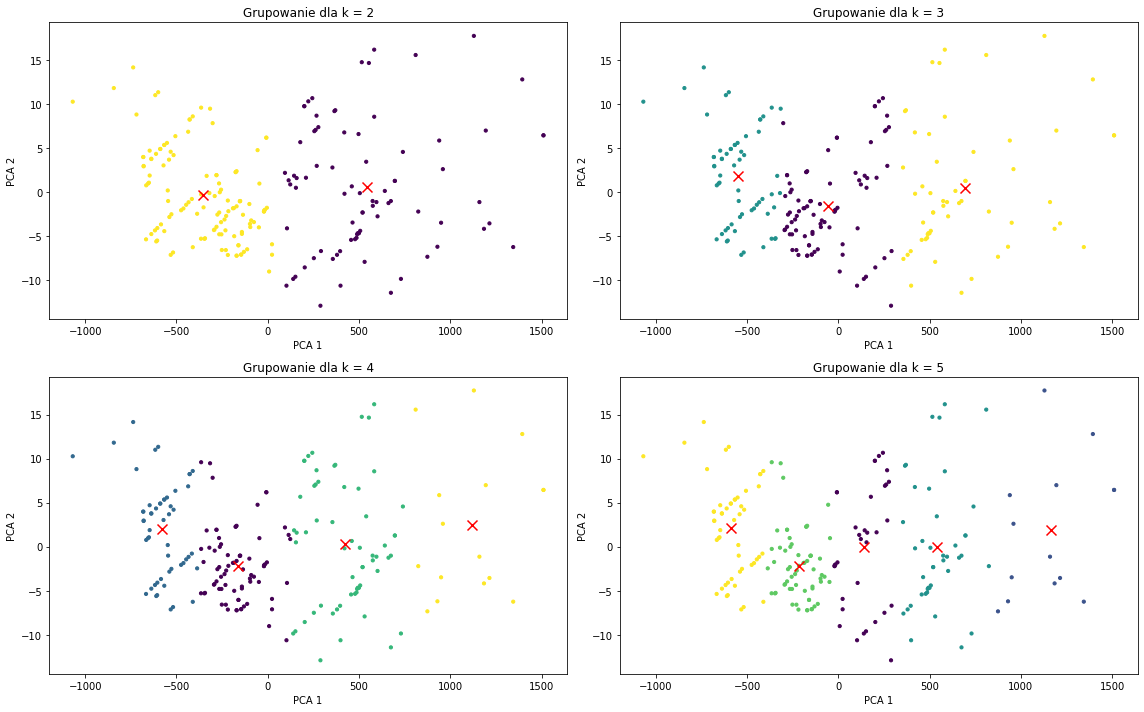

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
 
data = pd.read_csv('autos.csv')
features = ['width', 'length', 'height', 'curb-weight','city-mpg']
dataset = data[features].dropna().values
 
 
def distp(X, C):
    n_samples_X = X.shape[0]
    n_samples_C = C.shape[0]
    d = np.zeros((n_samples_X, n_samples_C))
    for i in range(n_samples_X):
        for j in range(n_samples_C):
            diff = X[i] - C[j]
            d[i, j] = np.sqrt(diff.dot(diff))
    return d
 
def distm(X, C):
    V = np.cov(X.T)
    print("cov matrix : ", V)
    V_inv = np.linalg.inv(V)
    print("cov matrix inverted : ", V_inv)
    n_samples_X =  X.shape[0]
    n_samples_C = C.shape[0]
    d = np.zeros((n_samples_X, n_samples_C))
   
    for i in range(n_samples_X):
        for j in range(n_samples_C):
            diff = X[i] - C[j]
            d[i, j] = np.sqrt(diff.dot(V_inv).dot(diff))
   
    return d
 
def ksrodki(X, k):
    C = X[np.random.choice(X.shape[0], size=k, replace=False)]
   
    while True:
        distances = distp(X,C)
        CX = np.argmin(distances, axis=1)
        new_C = np.array([X[CX == i].mean(axis=0) if np.any(CX == i) else C[i] for i in range(k)])
       
        if np.allclose(C, new_C):
            break
        C = new_C
   
    return C, CX
 
C2, CX2 = ksrodki(dataset, 2)
pca2 = PCA(n_components=2)
dataset2 = pca2.fit_transform(dataset)
C2_pca = pca2.transform(C2)


C3, CX3 = ksrodki(dataset, 3)
pca3 = PCA(n_components=2)
dataset3 = pca3.fit_transform(dataset)
C3_pca = pca3.transform(C3)

C4, CX4 = ksrodki(dataset, 4)
pca4 = PCA(n_components=2)
dataset4 = pca4.fit_transform(dataset)
C4_pca = pca4.transform(C4)

C5, CX5 = ksrodki(dataset, 5)
pca5 = PCA(n_components=2)
dataset5 = pca5.fit_transform(dataset)
C5_pca = pca5.transform(C5)

plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
plt.scatter(dataset2[:, 0], dataset2[:, 1], c=CX2, cmap='viridis', s=10)
plt.scatter(C2_pca[:, 0], C2_pca[:, 1], c='red', marker='x', s=100)
plt.title('Grupowanie dla k = 2')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.subplot(2, 2, 2)
plt.scatter(dataset3[:, 0], dataset3[:, 1], c=CX3, cmap='viridis', s=10)
plt.scatter(C3_pca[:, 0], C3_pca[:, 1], c='red', marker='x', s=100)
plt.title('Grupowanie dla k = 3')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.subplot(2, 2, 3)
plt.scatter(dataset4[:, 0], dataset4[:, 1], c=CX4, cmap='viridis', s=10)
plt.scatter(C4_pca[:, 0], C4_pca[:, 1], c='red', marker='x', s=100)
plt.title('Grupowanie dla k = 4')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.subplot(2, 2, 4)
plt.scatter(dataset5[:, 0], dataset5[:, 1], c=CX5, cmap='viridis', s=10)
plt.scatter(C5_pca[:, 0], C5_pca[:, 1], c='red', marker='x', s=100)
plt.title('Grupowanie dla k = 5')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.tight_layout()
plt.show()